# Teste Carro Decision Tree

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
data = dataset 
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
data1 = data[['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG','city mpg','Popularity']]
X = data1
X

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
0,335.0,6.0,2.0,26,19,3916
1,300.0,6.0,2.0,28,19,3916
2,300.0,6.0,2.0,28,20,3916
3,230.0,6.0,2.0,28,18,3916
4,230.0,6.0,2.0,28,18,3916
...,...,...,...,...,...,...
11909,300.0,6.0,4.0,23,16,204
11910,300.0,6.0,4.0,23,16,204
11911,300.0,6.0,4.0,23,16,204
11912,300.0,6.0,4.0,23,16,204


In [4]:
np.isnan(X).sum()

Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
dtype: int64

In [5]:
np.isinf(X).sum()

Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
dtype: int64

In [6]:
X = X.fillna(X.mean())

In [7]:
np.isnan(X).sum()

Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
dtype: int64

In [8]:
X

,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity
0,335.0,6.0,2.0,26,19,3916
1,300.0,6.0,2.0,28,19,3916
2,300.0,6.0,2.0,28,20,3916
3,230.0,6.0,2.0,28,18,3916
4,230.0,6.0,2.0,28,18,3916
...,...,...,...,...,...,...
11909,300.0,6.0,4.0,23,16,204
11910,300.0,6.0,4.0,23,16,204
11911,300.0,6.0,4.0,23,16,204
11912,300.0,6.0,4.0,23,16,204


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [11]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 51300.          91900.        ]
 [ 63891.66666667 136900.        ]
 [ 38750.          38000.        ]
 ...
 [ 30233.33333333  35300.        ]
 [441600.         441600.        ]
 [ 21076.11111111  20360.        ]]


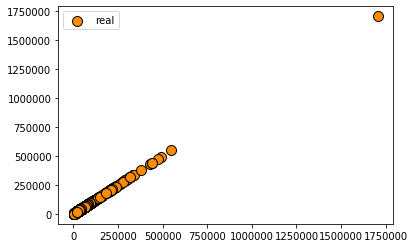

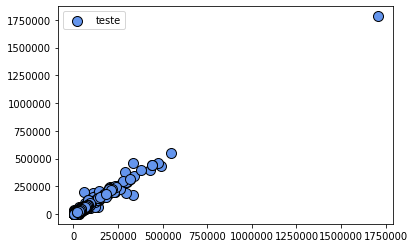

In [12]:
plt.figure()
plt.scatter(y_test, y_test, s=100, edgecolor="black",
            c="darkorange", label="real")
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()
plt.figure()
plt.scatter(y_test, y_pred,s=100,edgecolor='black', c="cornflowerblue",
         label="teste")
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()

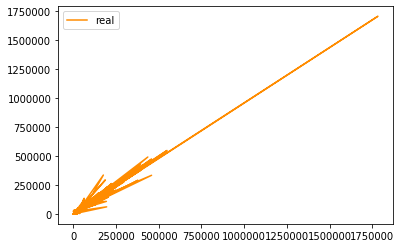

In [13]:
plt.figure()
plt.plot(y_pred, y_test,
            c="darkorange", label="real")
plt.xlabel("")
plt.ylabel("")
plt.title("")
plt.legend()
plt.show()